[![View filled on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/matteo-bertini/Facial-Expression-Recognition)
[![Open filled In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/matteo-bertini/Facial-Expression-Recognition/blob/main/Five_Layers_CNN.ipynb)

# Importing the libraries
The libraries to implement Five-Layers-CNN and related utilities are imported here.

In [1]:
import random
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import tensorflow as tf
from tensorflow import keras,convert_to_tensor
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split,StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D,ReLU
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback,ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# GPU Check
This section checks whether the GPU is in use or not.

In [2]:
num_gpu_available = len(tf.config.list_physical_devices('GPU'))
if num_gpu_available == 0 :
  print("You are not using GPU.\n")
else:
  print("You are using GPU.\n")

You are using GPU.



In [3]:
# Command to run to see the specs of the assigned GPU. (only valid if GPU is in use)
!nvidia-smi

Thu Jan 12 13:40:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Mounting Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Dataset
The dataset provided by the .csv file is uploaded and processed here.


## Loading the dataset from the csv file
In this section the file "icml_face_data.csv" is loaded inside a dataframe, which is processed and then divided into three other dataframes (one for train, one for validation and one for test) according to the value of the "usage" column.

In [6]:
# Loading icml_face_data.csv into dataframe df_icml
df_icml = pd.read_csv("/content/drive/MyDrive/Facial-Expression-Recognition/challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv",sep=",")

# Columns renamed for easier access.
df_icml.rename(columns = {' Usage':'usage'}, inplace = True)
df_icml.rename(columns = {' pixels':'pixels'}, inplace = True)

# Transforming pixel strings into 48x48 tensors of float32
df_icml["pixels"] = df_icml['pixels'].apply(lambda x: np.array(x.split()).reshape(48, 48,1).astype('float32'))                                                          


## Creating the Train-Val-Test split
Here the dataframes for training, validation and testing are processed to be in a format acceptable to the neural network.\
In this section the split is created based on the values ​​of the "usage" column in the df_icml dataframe.

In [ ]:

# Creating the df_train,df_val_df_test dataframes
df_train = df_icml.loc[df_icml['usage'].isin(["Training"])]
df_val = df_icml.loc[df_icml['usage'].isin(["PrivateTest"])]
df_test = df_icml.loc[df_icml['usage'].isin(["PublicTest"])]

# Creating the train,val,test split accordingly to the specifics of the project.

# Train 
X_train = df_train['pixels']
X_train = np.stack(X_train, axis=0)
X_train = X_train/255
print("X_train has shape: ")
print(X_train.shape)
y_train = df_train["emotion"].to_numpy()
y_train = to_categorical(y_train)
print("y_train has shape: ")
print(y_train.shape)

# Validation
X_val = df_val['pixels']
X_val = np.stack(X_val, axis=0)
X_val = X_val/255
print("X_val has shape: ")
print(X_val.shape)
y_val = df_val["emotion"].to_numpy()
y_val = to_categorical(y_val)
print("y_val has shape: ")
print(y_val.shape)

# Test
X_test = df_test['pixels']
X_test = np.stack(X_test, axis=0)
X_test = X_test/255
print("X_test has shape: ")
print(X_test.shape)
y_test = df_test["emotion"].to_numpy()                                        
y_test = to_categorical(y_test)
print("y_test has shape: ")
print(y_test.shape)

# Transforming sets from numpy array to tensors

X_train = convert_to_tensor(X_train)
X_val = convert_to_tensor(X_val)
X_test = convert_to_tensor(X_test)



## Creating the Train-Test split using sklearn
In this section the split is created with the use of the sklearn library.
This is useful for applying the Stratified K-Fold Cross Validation strategy.

In [44]:
# Creating the X numpyarray
X = df_icml["pixels"]
X = np.stack(X, axis=0)
print("X has shape: ")
print(X.shape)

# Creating the y numpyarray
y = df_icml["emotion"].to_numpy()
y = to_categorical(y)
print("y has shape: ")
print(y.shape)

print("\n")
# Creating the train,val,test split using sklearn library
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,shuffle=True,stratify=y)
print("Numpy array shapes:")
print("X_train has shape: ")
print(X_train.shape)
print("y_train has shape: ")
print(y_train.shape)
print("X_test has shape: ")
print(X_test.shape)
print("y_test has shape: ")
print(y_test.shape)

print("\n")
# Transforming sets from numpy array to tensors
X_train = convert_to_tensor(X_train)
X_test = convert_to_tensor(X_test)
print("Tensor shapes:")
print("X_train has shape: ")
print(X_train.shape)
print("y_train has shape: ")
print(y_train.shape)
print("X_test has shape: ")
print(X_test.shape)
print("y_test has shape: ")
print(y_test.shape)

X has shape: 
(35887, 48, 48, 1)
y has shape: 
(35887, 7)


Numpy array shapes:
X_train has shape: 
(17943, 48, 48, 1)
y_train has shape: 
(17943, 7)
X_test has shape: 
(17944, 48, 48, 1)
y_test has shape: 
(17944, 7)


Tensor shapes:
X_train has shape: 
(17943, 48, 48, 1)
y_train has shape: 
(17943, 7)
X_test has shape: 
(17944, 48, 48, 1)
y_test has shape: 
(17944, 7)


## Assignment of class weights
In this section, class weights are calculated and assigned. These weights are useful in the training phase to manage the imbalance between classes that emerged in the Exploratory Data Analysis.
The following formula will be used to calculate the class weights:\
          **wj = n_samples / (n_classes * n_samplesj)**\
where:


*   wj is the weight for each class (j is the index of the class)
*   n_samples is the total number of samples or rows in the dataset
*   n_classes is the total number of unique classes in the dataset
*   n_samplesj is the total number of rows of the respective class (j is the index of the class)





In [24]:
# computing the total number of samples in the train set
n_samples = y_train.shape[0]

# declaration of the weights dictionary to pass in the training phase
weights = {0:0.0,1:0.0,2:0.0,3:0.0,4:0.0,5:0.0,6:0.0}

# counting n_samples j for each class
for j in range(n_samples):
  idx = y_train[j].argmax()
  weights[idx]=weights[idx]+1

# computing the weights for each class
for j in range(7):
  weights[j] = n_samples/ (7* weights[j])

# visualizing the weights
display(weights)

{0: 1.0350653096542914,
 1: 9.36963819470347,
 2: 1.0009962143853357,
 3: 0.570338752156934,
 4: 0.843575794210491,
 5: 1.2811750905288928,
 6: 0.8272409932160969}

# Loading the Five-Layers-CNN from saved file
In this section the Five-Layers-CNN model is loaded in its entirety.
Specifically, the network structure (the various layers) will be loaded together with the various weights learned during the training phase.
If you choose to upload the model there is no need to train the network and you can go directly to the testing section.

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/Facial-Expression-Recognition/Five-Layers-CNN.h5")
model.summary()

Model: "Five-Layers-CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_56 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 re_lu_56 (ReLU)             (None, 48, 48, 64)        0         
                                                                 
 conv2d_49 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_57 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 re_lu_57 (ReLU)             (None, 48, 48, 64)    

# Building the Five-Layers-CNN from scratch


## Creating the network structure
Here the architecture of Five-Layers-CNN is created from scratch.\
The structure of the network is the same as described in the paper, with some differences:


1.   The l2 regularizations have been removed
2.   A 2d convolution has been added



In [29]:
model = Sequential()
model._name = "Five-Layers-CNN"


# First Layer : Input

# Second Layer
#-------------------------------------------------------------------------------------------------------------------------------#
model.add(Conv2D(filters = 64,kernel_size = (3, 3),input_shape = (48, 48, 1),padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(ReLU())
#-------------------------------------------------------------------------------------------------------------------------------#
model.add(Conv2D(filters = 64,kernel_size = (3, 3),padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(ReLU())
#-------------------------------------------------------------------------------------------------------------------------------#
model.add(Conv2D(filters = 64,kernel_size = (3, 3),padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(ReLU())
#-------------------------------------------------------------------------------------------------------------------------------#
model.add(MaxPooling2D(pool_size = (2, 2),strides = (2,2)))
model.add(Dropout(0.1))
#-------------------------------------------------------------------------------------------------------------------------------#

# Third Layer
#-------------------------------------------------------------------------------------------------------------------------------#
model.add(Conv2D(filters = 128,kernel_size = (3, 3),padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(ReLU())
#-------------------------------------------------------------------------------------------------------------------------------#
model.add(Conv2D(filters = 128,kernel_size = (3, 3),padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(ReLU())
#-------------------------------------------------------------------------------------------------------------------------------#
model.add(MaxPooling2D(pool_size = (2, 2),strides = (2,2)))
model.add(Dropout(0.25))
#-------------------------------------------------------------------------------------------------------------------------------#

# Fourth Layer
#--------------------------------------------- ADDING THE 2D CONVOLUTION -------------------------------------------------------#
model.add(Conv2D(filters = 512,kernel_size = (3, 3),padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(ReLU())
#-------------------------------------------------------------------------------------------------------------------------------#
model.add(Flatten(name='flatten'))     
model.add(Dense(512))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.1))
model.add(Dense(7,activation='softmax'))


# After creating the structure of the network, we visualize it in a compact way.
model.summary()

Model: "Five-Layers-CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_21 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 re_lu_21 (ReLU)             (None, 48, 48, 64)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_22 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 re_lu_22 (ReLU)             (None, 48, 48, 64)    

## Compiling the model
In this section the model is compiled, in particular are defined:


*   the loss function (categorical crossentropy)
*   the optimizator (adam optimizer)
*   the evaluation metrics (accuracy)







In [31]:
# defining the loss function,the optimizer and the evaluation metrics
opt = keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = opt,
    metrics = ['accuracy']
)


In [27]:
# defining some callbacks 

# this callback reduces learning rate when the metric passed has stopped improving (prevents overfitting)
# reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',factor=0.1,patience=2,min_lr=0,verbose=1)

# this callback stops training when a monitored metric has stopped improving (prevents overfitting)
early_stopping = EarlyStopping(monitor = "val_accuracy",min_delta = 0.0035,patience = 2,verbose = 1)

callbacks = [early_stopping]

# Training the Five-Layers-CNN
in this section the net is trained on the training set.

In [ ]:
print("Training:\n")
num_epochs = 10
batch_size = 32
history = model.fit(X_train,y_train,batch_size=batch_size,epochs=num_epochs,validation_data=(X_val, y_val),class_weight=weights)


## Learning curves visualization
Here the learning curves are displayed.
In particular, it is displayed how the loss and accuracy change for the training set and for the validation set during the various training epochs.

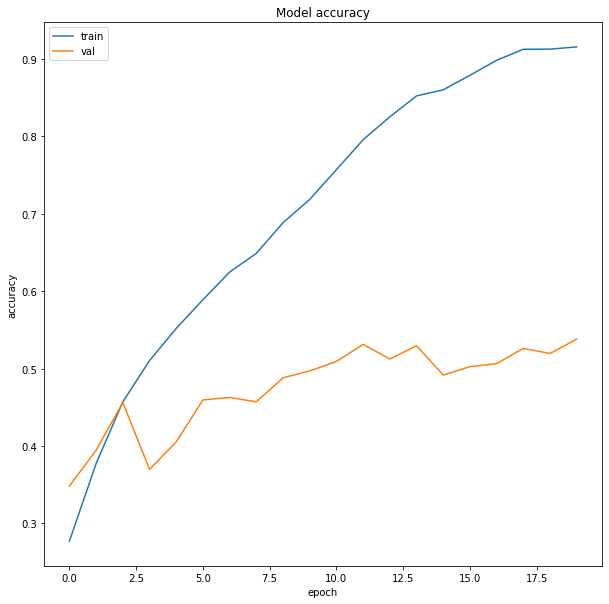

In [ ]:
# visualizing the accuracy learning curves

# creating the figure
acc_lc = plt.figure(figsize = (10,10))

# plotting training and validation accuracy
plt.plot(history.history['accuracy'])                                                         
plt.plot(history.history['val_accuracy'])  

# setting plot title
plt.title('Model accuracy')

# setting x and y ticks and labels for the plot
plt.ylabel('accuracy')
#plt.yticks([0.0,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.0])
plt.xlabel('epoch')
#plt.xticks(range(0,num_epochs+1))

# setting the legend for the plot
plt.legend(['train', 'val'], loc='upper left')

# showing the figure
plt.show(acc_lc)

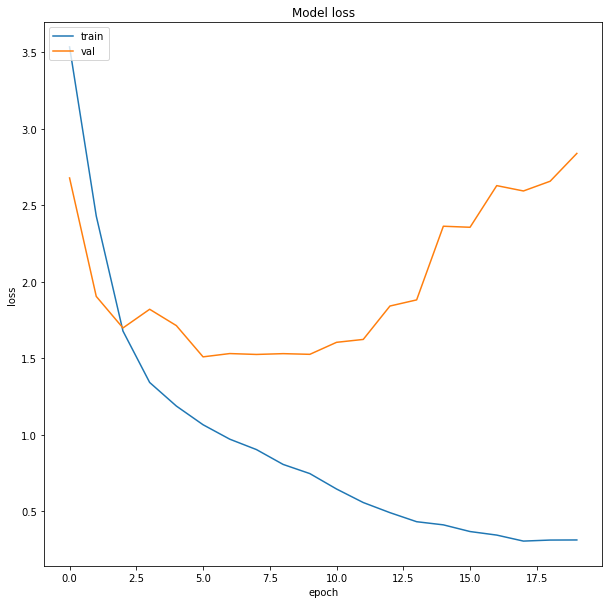

In [ ]:
# visualizing the loss learning curves

# creating the figure
loss_lc = plt.figure(figsize = (10,10))

# plotting training and validation accuracy
plt.plot(history.history['loss'])                                                         
plt.plot(history.history['val_loss'])  

# setting plot title
plt.title('Model loss')

# setting x and y ticks and labels for the plot
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.xticks(range(0,num_epochs+1))

# setting the legend for the plot
plt.legend(['train', 'val'], loc='upper left')

# showing the figure
plt.show(loss_lc)

# Training the Five-Layers-CNN using Stratified K-Fold Strategy

In [32]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
stratified_accuracy = []
for train_index, test_index in skf.split(X_train, y_train.argmax(1)): 
    X_train_fold, X_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    history = model.fit(X_train_fold, y_train_fold,epochs=5,batch_size=32) 
    stratified_accuracy.append(model.evaluate(X_test_fold, y_test_fold))
    




Epoch 1/5
707/707 [==============================] - 24s 32ms/step - loss: 1.6564 - accuracy: 0.3831
Epoch 2/5
707/707 [==============================] - 23s 32ms/step - loss: 1.3301 - accuracy: 0.5013
Epoch 3/5
707/707 [==============================] - 22s 31ms/step - loss: 1.1525 - accuracy: 0.5711
Epoch 4/5
707/707 [==============================] - 22s 32ms/step - loss: 1.0018 - accuracy: 0.6312
Epoch 5/5
79/79 [==============================] - 1s 10ms/step - loss: 1.3587 - accuracy: 0.5370
Epoch 1/5
707/707 [==============================] - 22s 32ms/step - loss: 0.8088 - accuracy: 0.7059
Epoch 2/5
707/707 [==============================] - 22s 32ms/step - loss: 0.6826 - accuracy: 0.7573
Epoch 3/5
707/707 [==============================] - 22s 32ms/step - loss: 0.5679 - accuracy: 0.8006
Epoch 4/5
707/707 [==============================] - 23s 32ms/step - loss: 0.4845 - accuracy: 0.8330
Epoch 5/5
79/79 [==============================] - 1s 10ms/step - loss: 0.7687 - accuracy: 0.7

In [36]:
acc = 0
for i in stratified_accuracy:
  acc = acc + i[1]
acc = acc/len(stratified_accuracy)
print(acc)


0.9034235656261445


# Testing the Five-Layers-CNN

## Test on the entire test set
In this section the test phase is carried out for the net that has just been trained.


In [45]:
test_history = model.evaluate(X_test,y_test,batch_size = 8)
print("Test Loss : %f , Test Accuracy : %f" %(test_history[0],test_history[1]))

2243/2243 [==============================] - 11s 5ms/step - loss: 0.5217 - accuracy: 0.8787
Test Loss : 0.521703 , Test Accuracy : 0.878734


## Visualizing class accuracy

## Visualizing the confusion matrix


## Test on a batch of arbitrary size
In this section, the newly trained net is tested on a batch of a chosen size. More specifically, the batch of random images will be displayed and the real labels will be compared with those predicted by the model.


In [38]:
# Definizione della funzione che crea un batch lungo n di samples dal set passato
def random_images(X,n):
  X_len = X.shape[0]
  ran_indices = random.sample(range(0,X_len,1),n)
  list = []
  for i in range(0,n):
    list.append(X[ran_indices[i]])

  return tf.stack(list),ran_indices

In [41]:
n = int(input("Inserisci qui il numero di sample su cui fare testing.\n"))

Inserisci qui il numero di sample su cui fare testing.
100


4/4 [==============================] - 0s 10ms/step
Groundtruth:



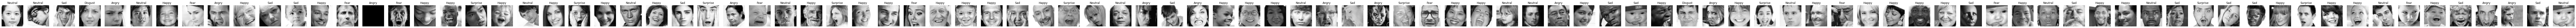



Predictions:



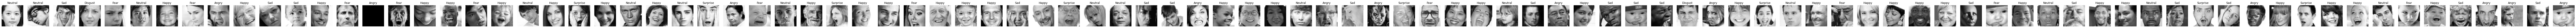

In [43]:
# Checking the output of the newly trained network on a random sample of n images from the test set
emotions = ["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]
images,indexes = random_images(X_test,n)
predictions = model.predict(images)

# Viewing the images in the batch with their correct labels
fig1 = plt.figure(figsize=(2*n, 2*n))
print("Groundtruth:\n")
j=1
for i in range(0,n):
  fig1.add_subplot(1,n,j)
  plt.axis("off")
  plt.imshow(images[i].numpy().reshape(48,48),cmap="gray")
  plt.title(emotions[y_test[indexes[i]].argmax()])
  j = j+1
plt.show(fig1)
print("\n")

# Viewing the images in the batch with their predicted labels
fig2 = plt.figure(figsize=(2*n, 2*n))
print("Predictions:\n")
j=1
for i in range(0,n):
  fig2.add_subplot(1,n,j)
  plt.axis("off")
  plt.imshow(images[i].numpy().reshape(48,48),cmap="gray")
  plt.title(emotions[predictions[i].argmax()])
  j = j+1
plt.show(fig2)

# Saving the model
After training and testing the model, it is saved for future loading.

In [22]:
model.save(filepath="/content/drive/MyDrive/Facial-Expression-Recognition/Five-Layers-CNN.h5")

OSError: ignored